# About:-

The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and claims which should be accepted for reimbursement. 

# Problem Statement:

You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviors. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 

# 1. Import Libraries and reading data files

In [5]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay, f1_score
from sklearn.metrics import accuracy_score
from scipy import stats

from sklearn.pipeline import Pipeline
from itertools import cycle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import function to perform feature selection
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# change the size of the graphs
plt.rcParams['figure.figsize'] = [15,12]

In [6]:
df=pd.read_csv('train_(1).csv')
df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0,Sedan


# Shape of the data

In [3]:
df.shape

(87285, 18)

# columns info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  int64  
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  int64  
 10  CHILDREN             87285 non-null  int64  
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

# Types of data

In [5]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR            object
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE           int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
TYPE_OF_VEHICLE         object
dtype: object

In [6]:
# create empty lists to store the column names
categorical_cols = []
numerical_cols = []
    
# loop through each column
for col in df.columns:
    # if the column is of object type or has less than 10 unique values, it is categorical
    if df[col].nunique() < 13:
        categorical_cols.append(col)
    # if the column has more than 20 unique values, it is numerical
    else:
        numerical_cols.append(col)

print('Categorical columns:', categorical_cols)
print('\n\nNumerical columns:', numerical_cols)


Categorical columns: ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'DUIS', 'OUTCOME', 'TYPE_OF_VEHICLE']


Numerical columns: ['ID', 'CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']


In [7]:
# convert numerical variables to categorical  
# Categorical columns
for i in categorical_cols:
    df[i]=df[i].astype('object')
for i in categorical_cols:
    print(i,df[i].dtype)  

AGE object
GENDER object
DRIVING_EXPERIENCE object
EDUCATION object
INCOME object
VEHICLE_OWNERSHIP object
VEHICLE_YEAR object
MARRIED object
CHILDREN object
DUIS object
OUTCOME object
TYPE_OF_VEHICLE object


In [8]:
# Numerical variable
for i in numerical_cols:
    df[i]= pd.to_numeric(df[i], errors='coerce')
for i in numerical_cols:
    print(i,df[i].dtype)

ID int64
CREDIT_SCORE float64
POSTAL_CODE int64
ANNUAL_MILEAGE int64
SPEEDING_VIOLATIONS int64
PAST_ACCIDENTS int64


# Unique rows in each column

In [9]:
df.nunique()

ID                     82657
AGE                        4
GENDER                     2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE           87262
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE            10061
ANNUAL_MILEAGE            20
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            16
OUTCOME                    2
TYPE_OF_VEHICLE            4
dtype: int64

# Check if there are any null values in both train and test data

In [10]:
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

# check duplicates

In [11]:
df[df.duplicated()]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE


In [12]:
#Target distribution
df['OUTCOME'].value_counts()

0    50367
1    36918
Name: OUTCOME, dtype: int64

Text(0.5, 1.0, 'OUTCOME')

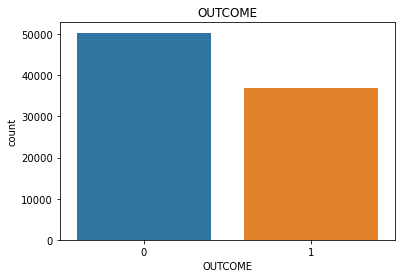

In [13]:
sns.countplot(x="OUTCOME",data=df)
plt.title('OUTCOME')

# 2.Exploratory data analysis

# Age

In [14]:
df['AGE'].value_counts()

40-64    27967
65+      27398
26-39    16677
16-25    15243
Name: AGE, dtype: int64

Text(0.5, 1.0, 'AGE')

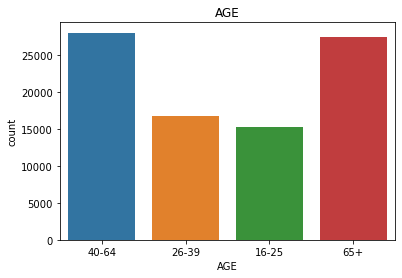

In [15]:
sns.countplot(x='AGE',data=df)
plt.title('AGE')

Text(0.5, 1.0, 'AGE vs OUTCOME')

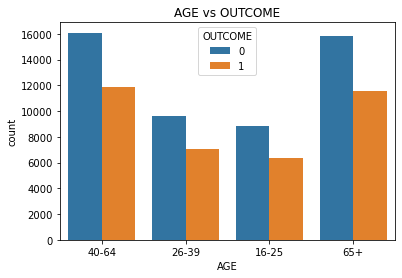

In [16]:
sns.countplot(x='AGE',hue='OUTCOME',data=df)
plt.title('AGE vs OUTCOME')

# Gender

In [17]:
df['GENDER'].value_counts()

male      54379
female    32906
Name: GENDER, dtype: int64

Text(0.5, 1.0, 'GENDER')

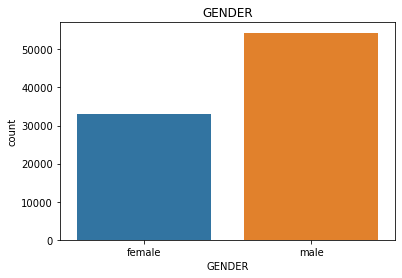

In [18]:
sns.countplot(x='GENDER',data=df)
plt.title('GENDER')

Text(0.5, 1.0, 'GENDER VS OUTCOME')

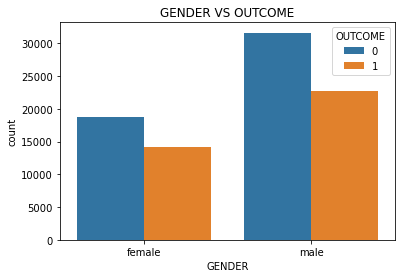

In [19]:
sns.countplot(x='GENDER',hue='OUTCOME',data=df)
plt.title('GENDER VS OUTCOME')

Text(0.5, 1.0, 'GENDER VS AGE')

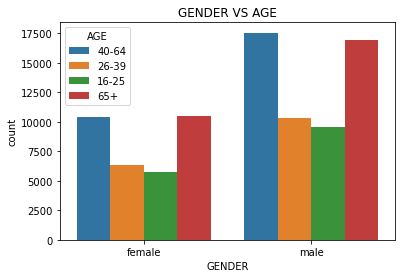

In [20]:
sns.countplot(x='GENDER',hue='AGE',data=df)
plt.title('GENDER VS AGE')

# DRIVING_EXPERIENCE

In [21]:
df['DRIVING_EXPERIENCE'].value_counts()

20-29y    31171
0-9y      27524
10-19y    20844
30y+       7746
Name: DRIVING_EXPERIENCE, dtype: int64

Text(0.5, 1.0, 'DRIVING_EXPERIENCE VS AGE')

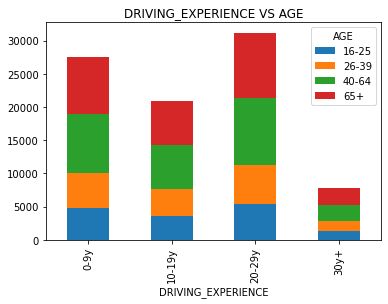

In [22]:
df.groupby(['DRIVING_EXPERIENCE','AGE']).size().unstack().plot(kind='bar',stacked=True)
plt.title('DRIVING_EXPERIENCE VS AGE')

Text(0.5, 1.0, 'DRIVING_EXPERIENCE VS OUTCOME')

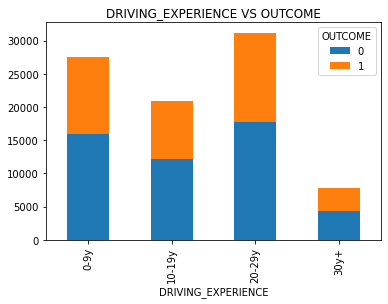

In [23]:
df.groupby(['DRIVING_EXPERIENCE','OUTCOME']).size().unstack().plot(kind='bar',stacked=True)
plt.title('DRIVING_EXPERIENCE VS OUTCOME')

# EDUCATION

In [24]:
df['EDUCATION'].value_counts()

high school    38746
university     25966
none           22573
Name: EDUCATION, dtype: int64

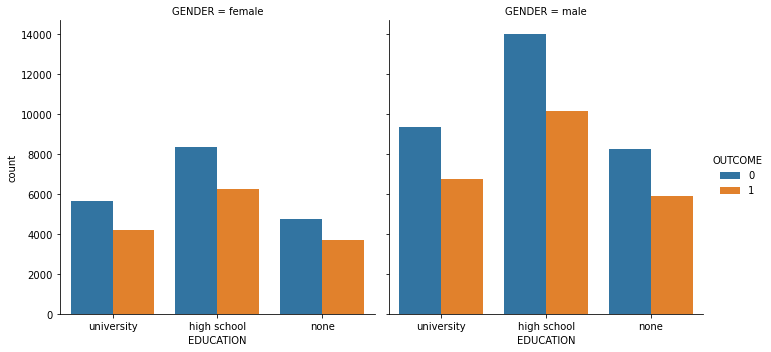

In [25]:
sns.catplot(x='EDUCATION', data=df, hue='OUTCOME', col='GENDER', kind='count')
plt.show()

# INCOME

In [26]:
df['INCOME'].value_counts()

upper class      42685
working class    20276
middle class     12203
poverty          12121
Name: INCOME, dtype: int64

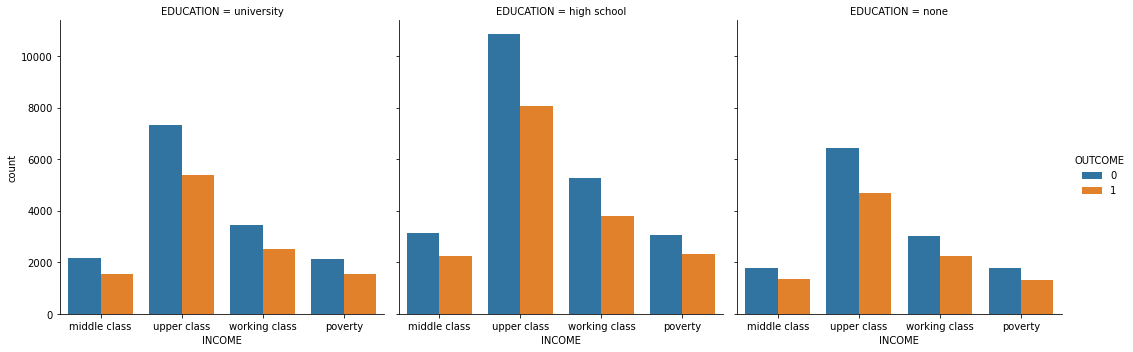

In [27]:
sns.catplot(x='INCOME', data=df, hue='OUTCOME', col='EDUCATION', kind='count')
plt.show()

# CREDIT_SCORE

In [28]:
df['CREDIT_SCORE'].value_counts()

0.442071    2
0.583765    2
0.501793    2
0.505614    2
0.755054    2
           ..
0.688666    1
0.761721    1
0.528849    1
0.717558    1
0.763635    1
Name: CREDIT_SCORE, Length: 87262, dtype: int64

Text(0.5, 1.0, 'CREDIT_SCORE VS OUTCOME')

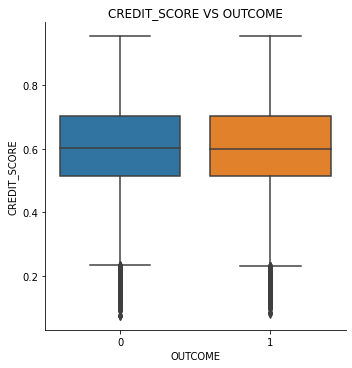

In [29]:
sns.catplot(y='CREDIT_SCORE', data=df, x='OUTCOME', kind='box')
plt.title('CREDIT_SCORE VS OUTCOME')

# VEHICLE_OWNERSHIP

In [30]:
df['VEHICLE_OWNERSHIP'].value_counts()

1    72251
0    15034
Name: VEHICLE_OWNERSHIP, dtype: int64

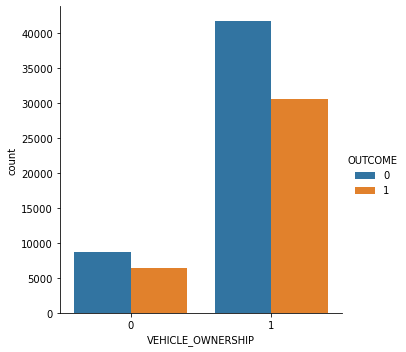

In [31]:
sns.catplot(x='VEHICLE_OWNERSHIP', data=df, hue='OUTCOME', kind='count')
plt.show()

# VEHICLE_YEAR

In [32]:
df['VEHICLE_YEAR'].value_counts()

before 2015    47738
after 2015     39547
Name: VEHICLE_YEAR, dtype: int64

Text(0.5, 1.0, 'VEHICLE_YEAR')

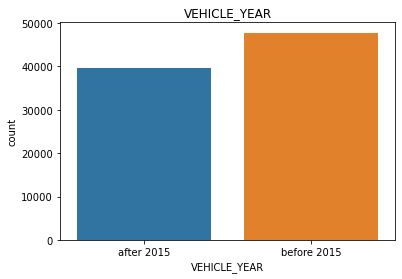

In [33]:
sns.countplot(x='VEHICLE_YEAR',data=df)
plt.title('VEHICLE_YEAR')

Text(0.5, 1.0, 'VEHICLE YEAR VS OUTCOME')

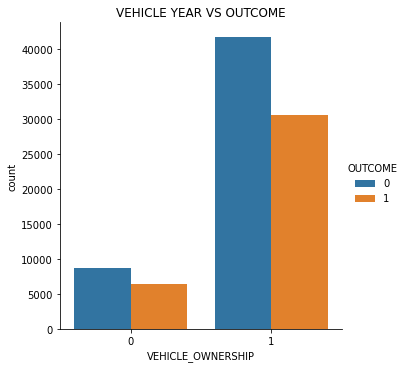

In [34]:
sns.catplot(x='VEHICLE_OWNERSHIP', data=df, hue='OUTCOME', kind='count')
plt.title('VEHICLE YEAR VS OUTCOME')

# MARRIED

In [35]:
df['MARRIED'].value_counts()

1    51059
0    36226
Name: MARRIED, dtype: int64

Text(0.5, 1.0, 'MARRIED')

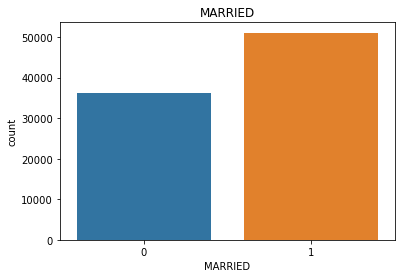

In [36]:
sns.countplot(x='MARRIED',data=df)
plt.title("MARRIED")

Text(0.5, 1.0, 'MARRED VS OUTCOME')

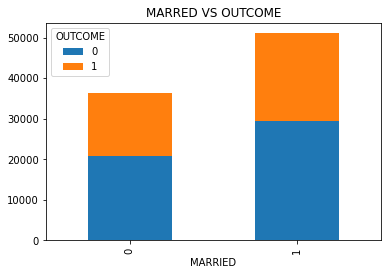

In [37]:
df.groupby(['MARRIED','OUTCOME']).size().unstack().plot(kind='bar',stacked=True)
plt.title('MARRED VS OUTCOME')

# CHILDREN

In [38]:
df['CHILDREN'].value_counts()

1    45366
0    41919
Name: CHILDREN, dtype: int64

C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CHILDREN')

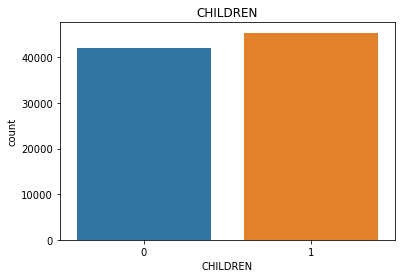

In [39]:
sns.countplot('CHILDREN',data=df)
plt.title('CHILDREN')

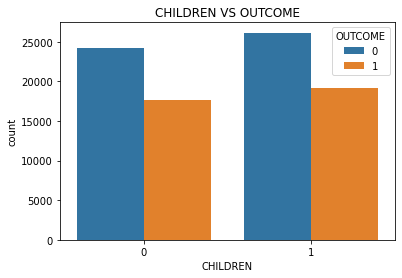

In [40]:
sns.countplot(x='CHILDREN',hue='OUTCOME',data=df)
plt.title('CHILDREN VS OUTCOME')
plt.show()

# POSTAL_CODE

In [41]:
df['POSTAL_CODE'].value_counts()

10238    64566
92101     1109
92100      326
92099      129
92098      110
         ...  
29600        1
32398        1
31290        1
18834        1
29398        1
Name: POSTAL_CODE, Length: 10061, dtype: int64

<AxesSubplot:xlabel='POSTAL_CODE'>

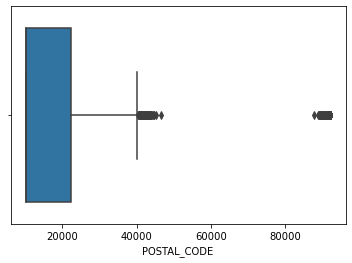

In [42]:
sns.boxplot(x='POSTAL_CODE',data=df)

<AxesSubplot:xlabel='POSTAL_CODE', ylabel='Density'>

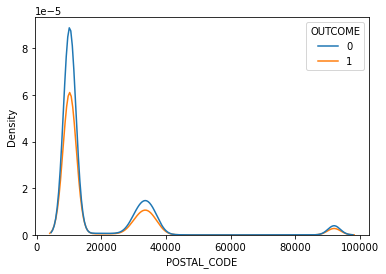

In [43]:
sns.kdeplot(x='POSTAL_CODE',hue='OUTCOME',data=df)

# ANNUAL_MILEAGE

In [44]:
df['ANNUAL_MILEAGE'].value_counts()

14000    13583
10000    13379
13000    13064
9000      9931
11000     8762
12000     7106
7000      5046
15000     4298
6000      3032
8000      2658
16000     1940
3000      1267
4000       987
5000       788
17000      508
2000       469
18000      256
19000      140
20000       67
21000        4
Name: ANNUAL_MILEAGE, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2000'),
  Text(1, 0, '3000'),
  Text(2, 0, '4000'),
  Text(3, 0, '5000'),
  Text(4, 0, '6000'),
  Text(5, 0, '7000'),
  Text(6, 0, '8000'),
  Text(7, 0, '9000'),
  Text(8, 0, '10000'),
  Text(9, 0, '11000'),
  Text(10, 0, '12000'),
  Text(11, 0, '13000'),
  Text(12, 0, '14000'),
  Text(13, 0, '15000'),
  Text(14, 0, '16000'),
  Text(15, 0, '17000'),
  Text(16, 0, '18000'),
  Text(17, 0, '19000'),
  Text(18, 0, '20000'),
  Text(19, 0, '21000')])

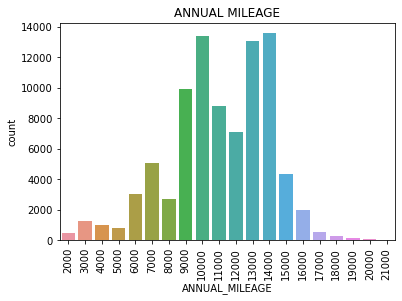

In [45]:
sns.countplot(x='ANNUAL_MILEAGE',data=df)
plt.title('ANNUAL MILEAGE')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'ANNUAL MILEAGE VS OUTCOME')

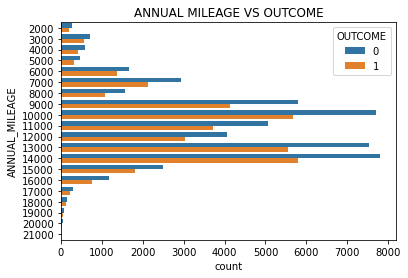

In [46]:
sns.countplot(y='ANNUAL_MILEAGE',hue='OUTCOME',data=df)
plt.title('ANNUAL MILEAGE VS OUTCOME')

# SPEEDING_VIOLATIONS

In [47]:
df['SPEEDING_VIOLATIONS'].value_counts()

0     57345
1     16578
2      7334
3      2515
4      1389
5       756
6       406
7       289
8       220
9       144
10       89
11       77
12       48
13       46
14       20
15       13
16        7
17        4
18        3
20        1
19        1
Name: SPEEDING_VIOLATIONS, dtype: int64

<AxesSubplot:xlabel='SPEEDING_VIOLATIONS', ylabel='Count'>

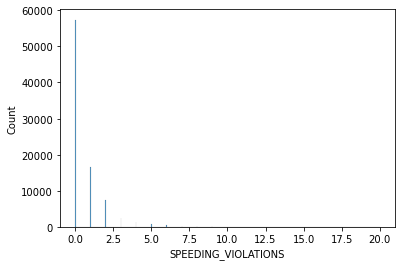

In [48]:
sns.histplot(x='SPEEDING_VIOLATIONS',data=df)

# DUIS

In [49]:
df['DUIS'].value_counts()

0    81681
1     2844
2      997
3      909
4      583
5      208
6       63
Name: DUIS, dtype: int64

Text(0.5, 1.0, 'DUIS VS OUTCOME')

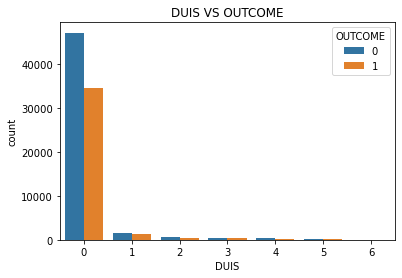

In [50]:
sns.countplot(x='DUIS',hue='OUTCOME',data=df)
plt.title('DUIS VS OUTCOME')

# PAST_ACCIDENTS

In [51]:
df['PAST_ACCIDENTS'].value_counts()

0     65610
1     11439
2      5341
3      1430
4      1098
5       755
6       452
7       335
8       282
9       182
10      131
11       77
12       56
13       44
14       31
15       22
Name: PAST_ACCIDENTS, dtype: int64

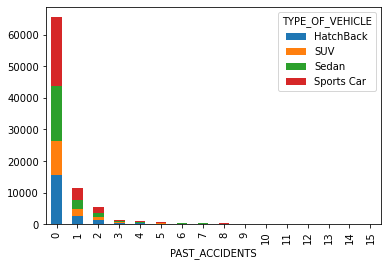

In [52]:
df.groupby(['PAST_ACCIDENTS','TYPE_OF_VEHICLE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Text(0.5, 1.0, 'PAST ACCIDENTS VS OUTCOME')

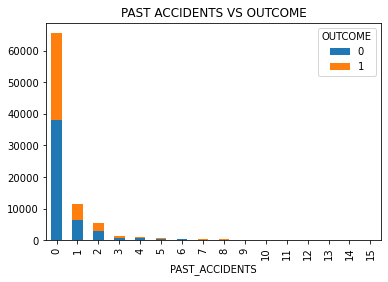

In [53]:
df.groupby(['PAST_ACCIDENTS','OUTCOME']).size().unstack().plot(kind='bar',stacked=True)
plt.title('PAST ACCIDENTS VS OUTCOME')

# TYPE_OF_VEHICLE

In [54]:
df['TYPE_OF_VEHICLE'].value_counts()

Sports Car    28723
Sedan         23410
HatchBack     20702
SUV           14450
Name: TYPE_OF_VEHICLE, dtype: int64

Text(0.5, 1.0, 'TYPE OF VEHICLE')

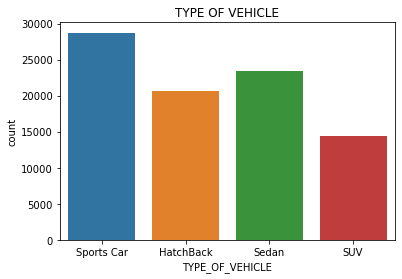

In [55]:
sns.countplot(x='TYPE_OF_VEHICLE',data=df)
plt.title('TYPE OF VEHICLE')

Text(0.5, 1.0, 'TYPE OF VEHICLE Vs OUTCOME')

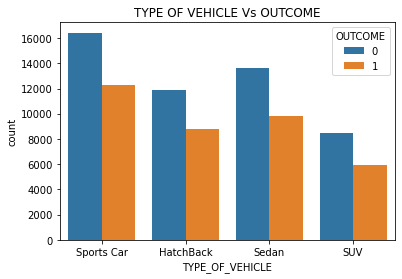

In [56]:
sns.countplot(x='TYPE_OF_VEHICLE',hue='OUTCOME',data=df)
plt.title('TYPE OF VEHICLE Vs OUTCOME')

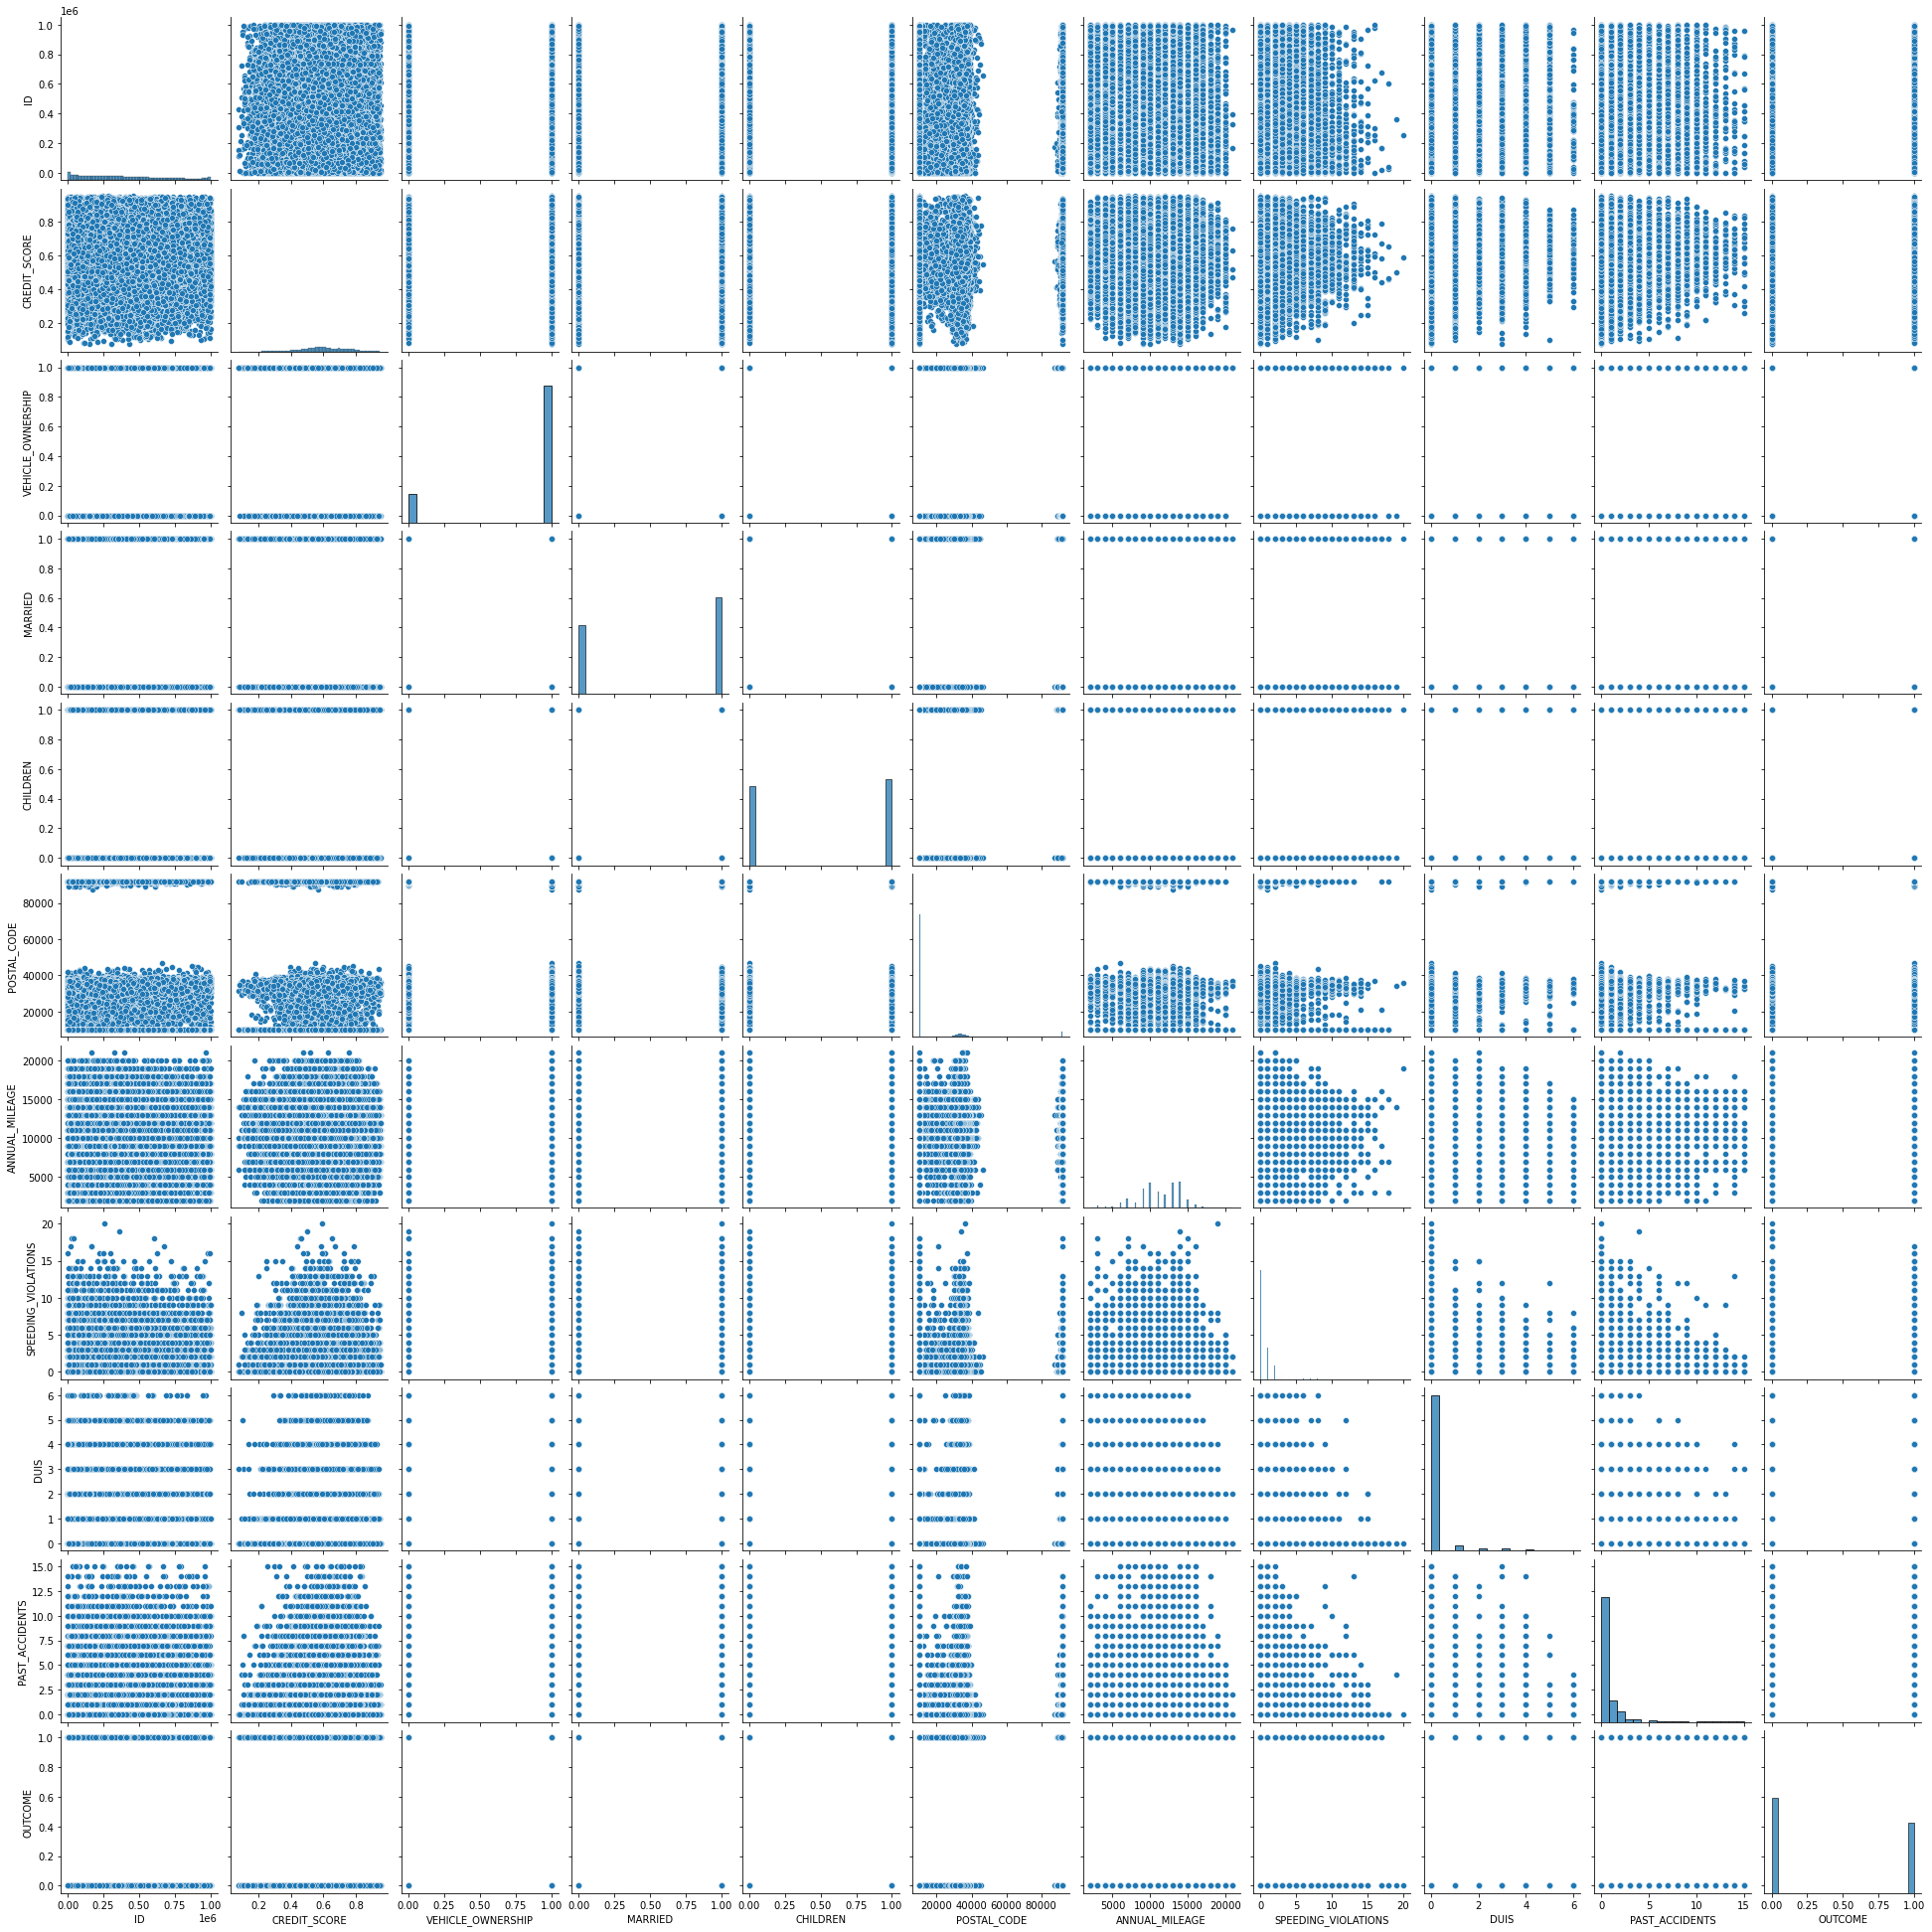

In [57]:
sns.pairplot(df)

# Outliers

ID: 0 outliers
CREDIT_SCORE: 595 outliers
POSTAL_CODE: 2959 outliers
ANNUAL_MILEAGE: 540 outliers
SPEEDING_VIOLATIONS: 6028 outliers
PAST_ACCIDENTS: 21675 outliers


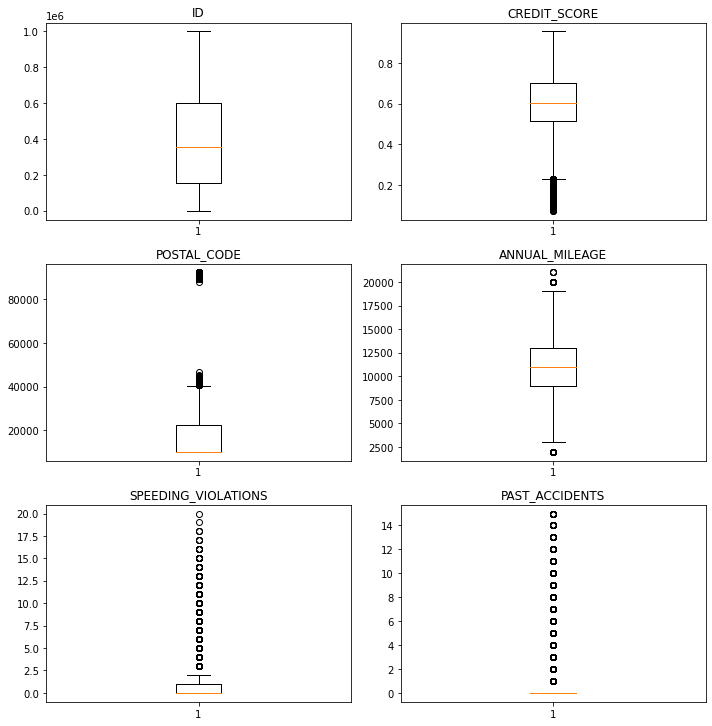

In [58]:
plt.figure(figsize=(10,20))
a=1
#subset=[]
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Compute the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    #if (df[col]<lower_bound) and (df[col]>upper_bound):
        #subset.append(df[col])
    # Identify and count the outliers
    num_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    
    # Print the results
    print(f"{col}: {num_outliers} outliers")
    plt.subplot(6,2,a)
    #Plot a boxplot of the column to visualize the outliers
    plt.boxplot(df[col])
    plt.title(col)
    #plt.show()
    a+=1

plt.tight_layout()
plt.show()

ID: 0 outliers
CREDIT_SCORE: 254 outliers
POSTAL_CODE: 2908 outliers
ANNUAL_MILEAGE: 540 outliers
SPEEDING_VIOLATIONS: 2124 outliers
PAST_ACCIDENTS: 2367 outliers


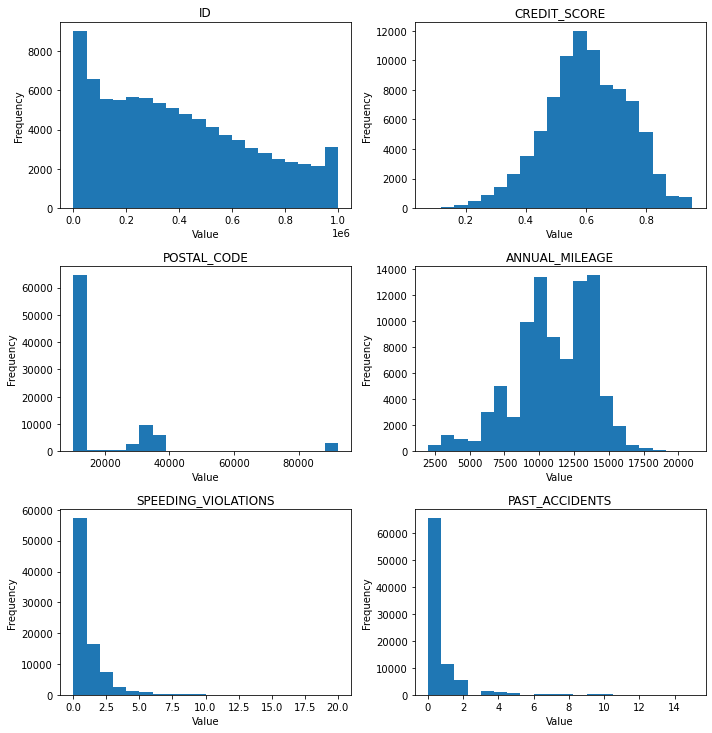

In [59]:
# Calculate the z-score for each value in the selected columns
z_scores = {}
for col in numerical_cols:
    z_scores[col] = np.abs((df[col] - df[col].mean()) / df[col].std())

# Identify outliers with z-score above 3
outliers = {}
for col in numerical_cols:
    outliers[col] = df[z_scores[col] > 3][col]

# Print the number of outliers found in each column
for col in numerical_cols:
    print(f"{col}: {len(outliers[col])} outliers")

# Visualize the distribution of each column to confirm the presence of outliers
plt.figure(figsize=(10,20))
a=1
for col in numerical_cols:
    #plt.figure()
    plt.subplot(6,2,a)
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    #plt.show()
    a+=1
plt.tight_layout()
plt.show()

In [60]:
from scipy import stats
outliers = stats.zscore(df[numerical_cols])

df = df[~((abs(outliers)<3).all(axis=1))]
df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1,Sedan
29,825346,65+,male,10-19y,none,upper class,0.770829,1,before 2015,1,0,92100,14000,0,0,0,1,Sedan
30,359584,65+,male,20-29y,high school,upper class,0.571851,0,before 2015,0,0,10238,13000,11,0,4,1,SUV
54,487015,65+,female,10-19y,high school,middle class,0.542091,1,before 2015,1,1,92007,13000,0,0,0,0,Sports Car
76,417449,65+,male,20-29y,none,upper class,0.737640,1,after 2015,0,0,10238,10000,6,0,0,0,HatchBack


C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

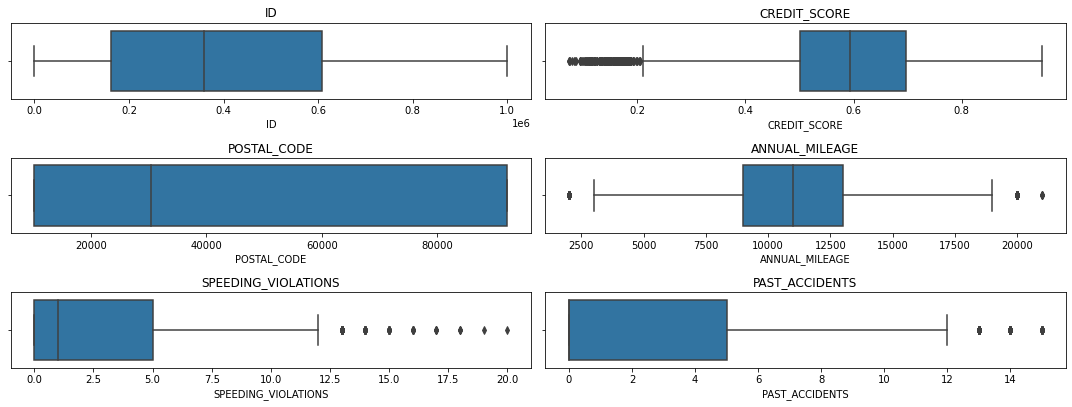

In [62]:
plt.figure(figsize=(15,24))
a=1
for i in numerical_cols:
    try:
        plt.subplot(13,2,a)
        sns.boxplot(df[i])
        plt.title(i)
        a+=1
    except:
        pass

plt.tight_layout()
plt.show()

# Checking skewness in dataset

In [63]:
df.skew()

C:\Users\manim\AppData\Local\Temp\ipykernel_9512\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ID                     0.430746
CREDIT_SCORE          -0.605204
VEHICLE_OWNERSHIP     -1.753235
MARRIED               -0.392016
CHILDREN              -0.067569
POSTAL_CODE            0.425558
ANNUAL_MILEAGE        -0.624385
SPEEDING_VIOLATIONS    1.512430
DUIS                   5.319524
PAST_ACCIDENTS         1.303582
OUTCOME                0.308898
dtype: float64

In [64]:
right_skewed=[]
left_skewed=[]
perfectly_skewed=[]
for i in df.columns:
    try:
        print("Skewness of ",i," = ",skew(df[i]))
        if(skew(df[i])<0):
            left_skewed.append(i)
        elif(skew(df[i])>0):
            right_skewed.append(i)
        elif(skew(df[i]==0)):
            perfectly_skewed.append(i)
    except:
        pass

Skewness of  ID  =  0.4306642832462211
Skewness of  CREDIT_SCORE  =  -0.6050895956345024
Skewness of  VEHICLE_OWNERSHIP  =  -1.7529024980827286
Skewness of  MARRIED  =  -0.3919411924672943
Skewness of  CHILDREN  =  -0.06755652451771003
Skewness of  POSTAL_CODE  =  0.4254775164057356
Skewness of  ANNUAL_MILEAGE  =  -0.6242662449419238
Skewness of  SPEEDING_VIOLATIONS  =  1.512143222327561
Skewness of  DUIS  =  5.318514976089012
Skewness of  PAST_ACCIDENTS  =  1.303334872961411
Skewness of  OUTCOME  =  0.30883953917028284


In [65]:
print("Right skewed distribution variables - \n\n",right_skewed,"\n\n")
print("Left skewed distribution variables - \n\n",left_skewed,"\n\n")
print("Perfeclty symmetrical distribution variables - \n\n",perfectly_skewed,"\n\n")

Right skewed distribution variables - 

 ['ID', 'POSTAL_CODE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'] 


Left skewed distribution variables - 

 ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE'] 


Perfeclty symmetrical distribution variables - 

 [] 




C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\manim\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

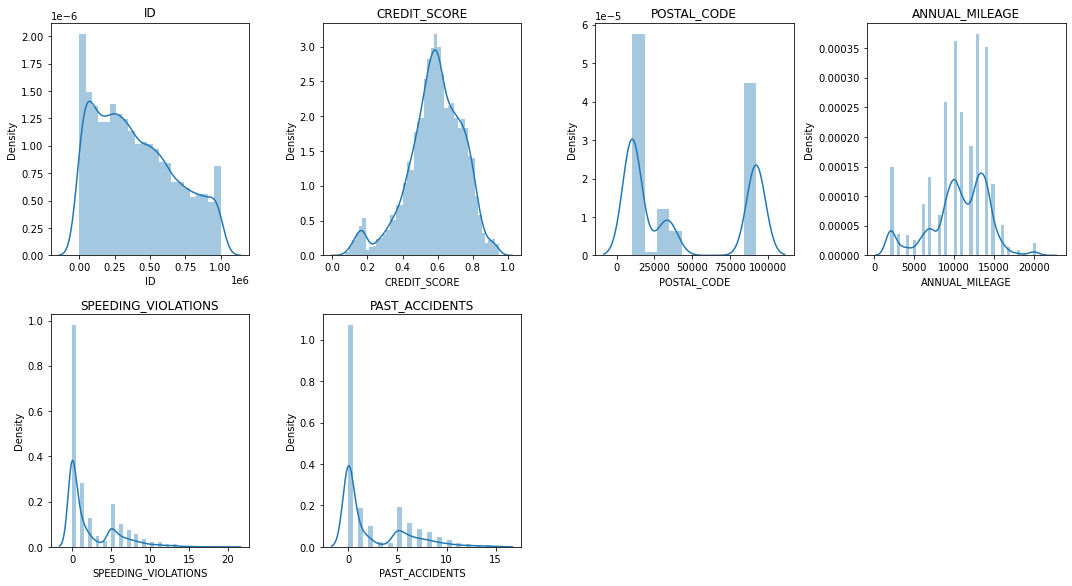

In [66]:
plt.figure(figsize=(15,24))
a=1

# selecting only numerical(continuous) variable
for i in df.select_dtypes(np.number).columns:
    plt.subplot(6,4,a)
    sns.distplot(df[i])
    plt.title(i)
    a+=1
    
plt.tight_layout()
plt.show()

In [67]:
#Using boxcox transformation for fixing skewness in dataset¶

In [68]:
# Loop over the numerical columns of the dataframe
for i in df.select_dtypes(np.number).columns:
    # Exclude the "Attrition" column
    if i != 'OUTCOME':
        # Add a small constant to the data to handle zero and negative values
        # checking minimum value available for variable and add that value as a constant
        c = np.min(df[i][df[i] > 0])
        df[i] = df[i] + c
        # Apply a Box-Cox transformation 
        df[i] = stats.boxcox(df[i])[0]
        # Removing added constant
        df[i] = df[i] - np.min(df[i])

C:\Users\manim\AppData\Local\Temp\ipykernel_9512\575036913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i] + c
C:\Users\manim\AppData\Local\Temp\ipykernel_9512\575036913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = stats.boxcox(df[i])[0]
C:\Users\manim\AppData\Local\Temp\ipykernel_9512\575036913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [69]:
#Skewness after transformation

In [70]:
right_skewed=[]
left_skewed=[]
perfectly_skewed=[]
for i in df.columns:
    try:
        print("Skewness of ",i," = ",skew(df[i]))
        if(skew(df[i])<0):
            left_skewed.append(i)
        elif(skew(df[i])>0):
            right_skewed.append(i)
        elif(skew(df[i]==0)):
            perfectly_skewed.append(i)
    except:
        pass

Skewness of  ID  =  -0.24616423523250744
Skewness of  CREDIT_SCORE  =  -0.05395886860549413
Skewness of  VEHICLE_OWNERSHIP  =  -1.7529024980827286
Skewness of  MARRIED  =  -0.3919411924672943
Skewness of  CHILDREN  =  -0.06755652451771003
Skewness of  POSTAL_CODE  =  0.1672787503004554
Skewness of  ANNUAL_MILEAGE  =  -0.09003835268954338
Skewness of  SPEEDING_VIOLATIONS  =  0.3163776571368531
Skewness of  DUIS  =  5.318514976089012
Skewness of  PAST_ACCIDENTS  =  0.3881578610469394
Skewness of  OUTCOME  =  0.30883953917028284


In [71]:
print("Right skewed distribution variables - \n\n",right_skewed,"\n\n")
print("Left skewed distribution variables - \n\n",left_skewed,"\n\n")
print("Perfeclty symmetrical distribution variables - \n\n",perfectly_skewed,"\n\n")

Right skewed distribution variables - 

 ['POSTAL_CODE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'] 


Left skewed distribution variables - 

 ['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE'] 


Perfeclty symmetrical distribution variables - 

 [] 




# Significant Variables

In [76]:
# Binary Target Variable
target_variable = 'OUTCOME'

# Perform chi-square test and analyze the relationships
for feature in categorical_cols:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}: p-value = {p_value}")

    # Analyze the relationship between the feature and target variable
    if p_value < 0.05:  # Set a significance level of 0.05
        print(f"There is a significant association between {feature} and {target_variable}")
        # Further analysis or interpretation based on the specific feature

    print()  # Add a line break between the results

Chi-square test for AGE: p-value = 0.9273784466111894

Chi-square test for GENDER: p-value = 0.3342046196270975

Chi-square test for DRIVING_EXPERIENCE: p-value = 0.01998843021997107
There is a significant association between DRIVING_EXPERIENCE and OUTCOME

Chi-square test for EDUCATION: p-value = 0.3059343023055995

Chi-square test for INCOME: p-value = 0.35309516646589917

Chi-square test for VEHICLE_OWNERSHIP: p-value = 0.6877967920527034

Chi-square test for VEHICLE_YEAR: p-value = 0.794859605078037

Chi-square test for MARRIED: p-value = 0.9918710309441136

Chi-square test for CHILDREN: p-value = 0.9478343198932894

Chi-square test for DUIS: p-value = 0.9205212355557875

Chi-square test for OUTCOME: p-value = 0.0
There is a significant association between OUTCOME and OUTCOME

Chi-square test for TYPE_OF_VEHICLE: p-value = 0.15103035087590444



In [77]:
# Perform statistical tests and analysis for numerical columns
for col in numerical_cols:
    # Perform a t-test or ANOVA to compare the means across different groups/levels of the Attrition variable
    test_stat, p_value = stats.ttest_ind(df[df['OUTCOME'] == 0][col],
                                         df[df['OUTCOME'] == 1][col])
    print(f"T-test/ANOVA for {col}: p-value = {p_value}")

    # Further analysis or interpretation based on the specific numerical column

    print()  # Add a line break between the results


T-test/ANOVA for ID: p-value = 0.8559372455063607

T-test/ANOVA for CREDIT_SCORE: p-value = 0.421888407255372

T-test/ANOVA for POSTAL_CODE: p-value = 0.9611382198413211

T-test/ANOVA for ANNUAL_MILEAGE: p-value = 0.5970108282405349

T-test/ANOVA for SPEEDING_VIOLATIONS: p-value = 0.9010670312428296

T-test/ANOVA for PAST_ACCIDENTS: p-value = 0.28473317183708835



In [78]:
# One-hot encode - used to convert categorical columns into numerical value like 0 or 1 using function get_dummies

encoded = pd.get_dummies(categorical_cols,drop_first=True)

# Print the encoded dataframe
print(encoded.head())

   CHILDREN  DRIVING_EXPERIENCE  DUIS  EDUCATION  GENDER  INCOME  MARRIED  \
0         0                   0     0          0       0       0        0   
1         0                   0     0          0       1       0        0   
2         0                   1     0          0       0       0        0   
3         0                   0     0          1       0       0        0   
4         0                   0     0          0       0       1        0   

   OUTCOME  TYPE_OF_VEHICLE  VEHICLE_OWNERSHIP  VEHICLE_YEAR  
0        0                0                  0             0  
1        0                0                  0             0  
2        0                0                  0             0  
3        0                0                  0             0  
4        0                0                  0             0  


# Model Building

### Random Forest

### This model is created firstly with all the features

In [9]:
# 2. Prepare the dataset
X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target variable

# 3. Encode categorical variables
X_encoded = pd.get_dummies(X)

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5. Create the base model
base_model = RandomForestClassifier(random_state=42)
#base_model = RandomForestClassifier(n_estimators=10,max_depth=4)
base_model.fit(X_train, y_train)

# 6. Evaluate the base model
y_pred_base = base_model.predict(X_test)
base_model_accuracy = accuracy_score(y_test, y_pred_base)
print("Confusion matrix : ", confusion_matrix(y_test,y_pred_base))
print("Base Model Accuracy : ", base_model_accuracy)


Confusion matrix :  [[8231 1839]
 [6088 1299]]
Base Model Accuracy :  0.5459128143438162


### The confusion matrix shows the following:
True Negative (TN): 8231 False Positive (FP): 1839 False Negative (FN): 6088 True Positive (TP): 1299

The base model achieved a high accuracy of 0.5459, indicating that it correctly predicted the majority of both the negative class (outcome=0) and the positive class (outcome=1). It made only one false negative prediction.

A high accuracy score suggests that the base model is performing well in predicting outcome.

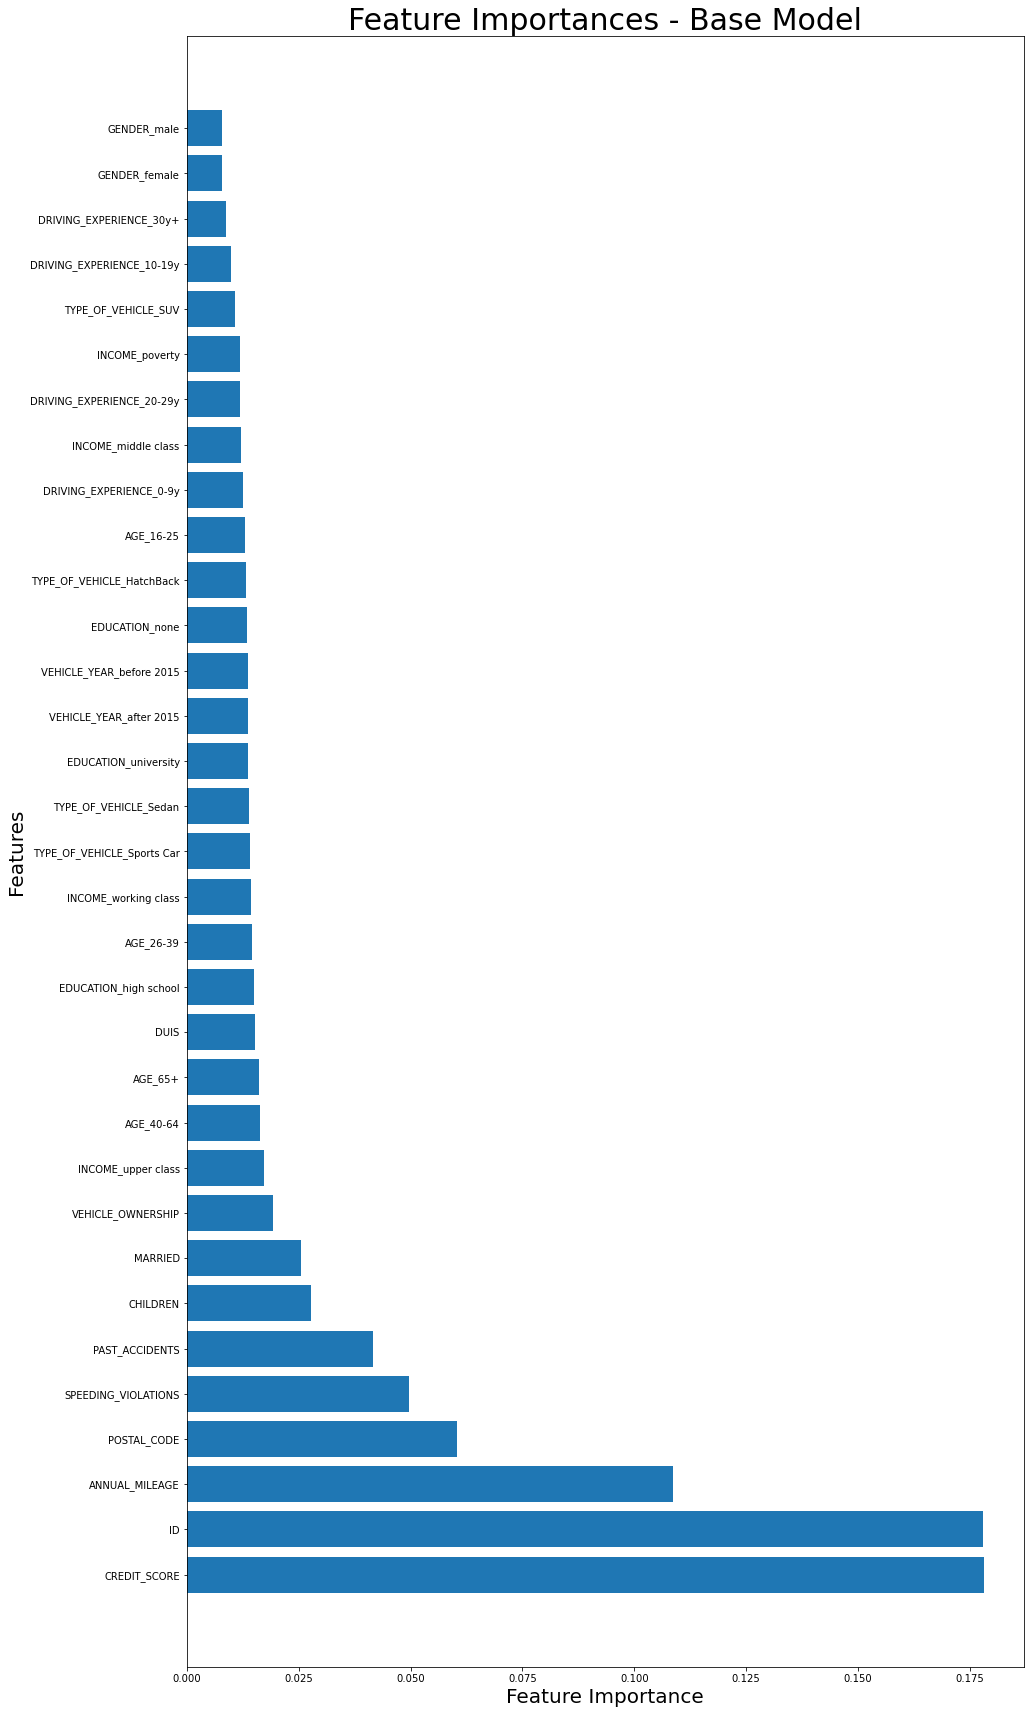

In [10]:
import matplotlib.pyplot as plt

# Get feature importances from the base model
feature_importances = base_model.feature_importances_

# Get the feature names
feature_names = X_encoded.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar graph
plt.figure(figsize=(15, 30))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.title("Feature Importances - Base Model",fontsize=30)
plt.show()


### Inference:

features are displayed on the y-axis and the feature importances are represented by the length of the bars on the x-axis. The features are sorted in descending order based on their importance. 'CREDIT_SCORE'and 'ID' has the highest importance.

### This model is created with significant variables

In [12]:

X = df[['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']]
y = df['OUTCOME']


X_encoded = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)


Confusion matrix: [[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### The confusion matrix indicates the following:
True Negative (TN): 10070 False Positive (FP): 0 False Negative (FN): 7387 True Positive (TP): 0

In this case, the model has achieved a high accuracy of 0.5768, indicating that it correctly predicted the majority of both the negative class (outcome=0) and the positive class (otcome=1). It only made one false negative prediction.

Overall, the model seems to perform well with a high accuracy score, suggesting it has a good ability to predict both classes accurately.

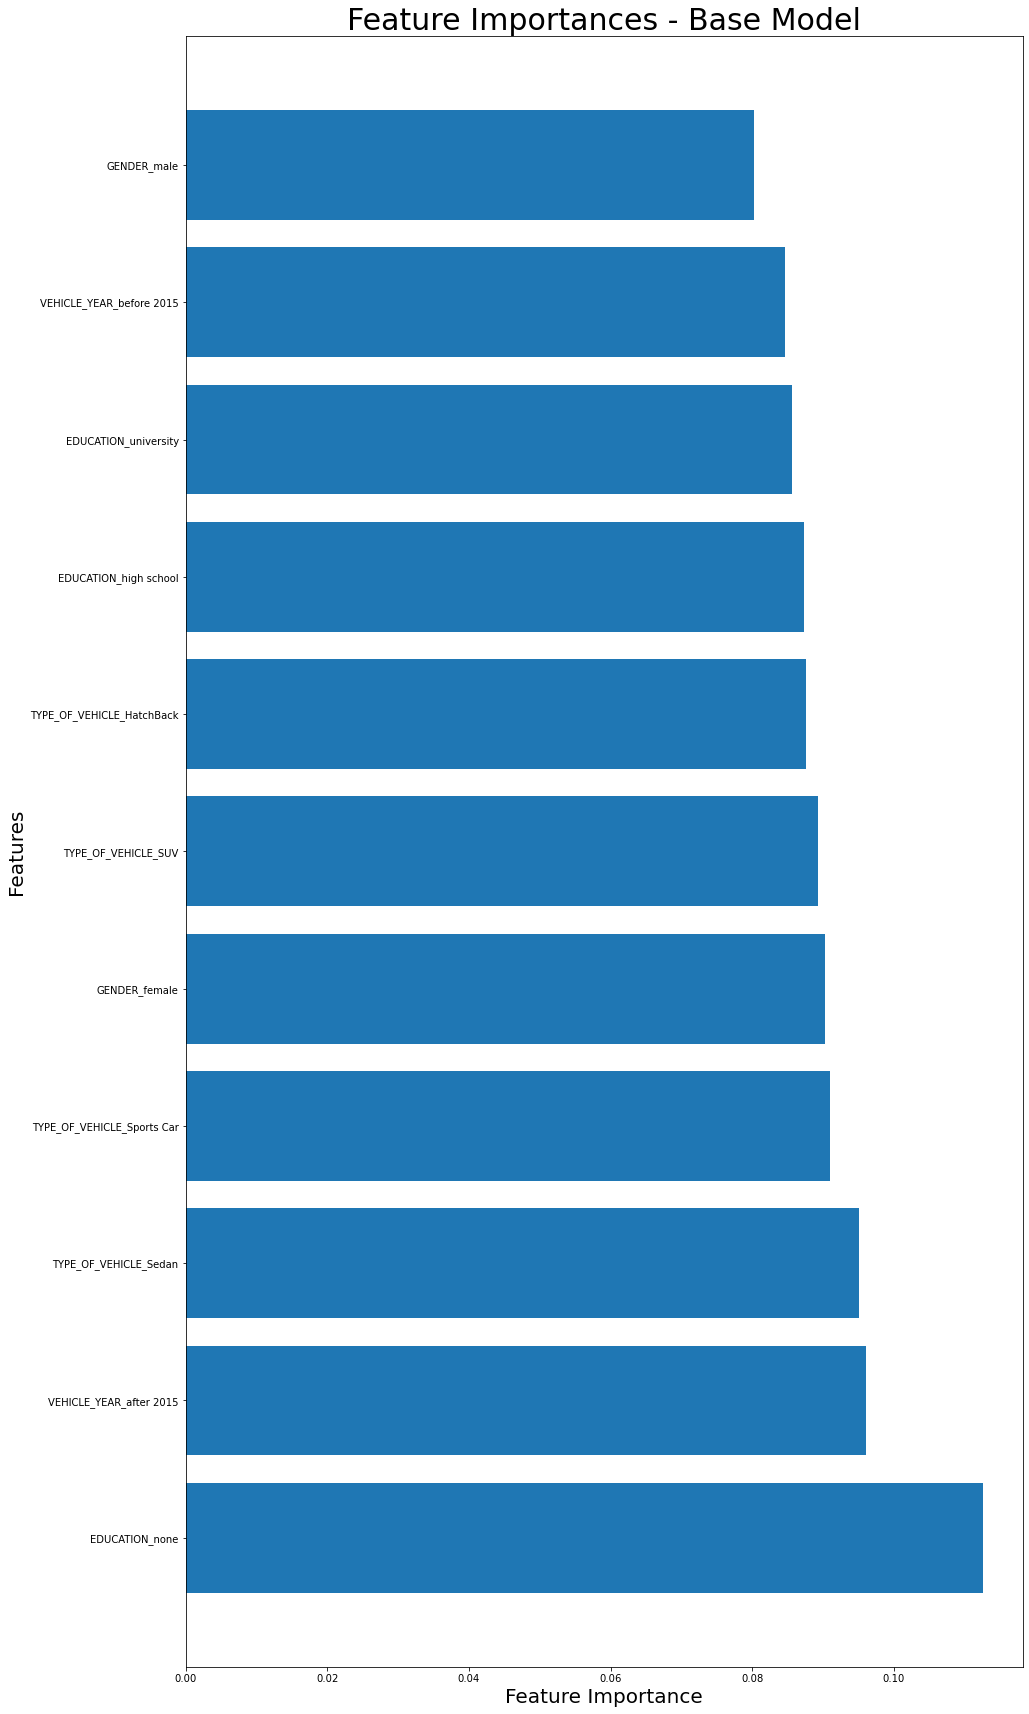

In [13]:
import matplotlib.pyplot as plt

# Get feature importances from the base model
feature_importances = model.feature_importances_

# Get the feature names
feature_names = X_encoded.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar graph
plt.figure(figsize=(15, 30))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.title("Feature Importances - Base Model",fontsize=30)
plt.show()


### Logistic Regression

In [14]:
X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target variable

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix: [[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### The confusion matrix indicates the following:
True Negative (TN): 10070 False Positive (FP): 0 False Negative (FN): 7387 True Positive (TP): 0

In this case, the model has achieved an accuracy of 0.576, indicating that it correctly predicted the negative class (outcome=0) for most of the cases. However, it failed to predict any positive cases (outcome=1), resulting in a high number of false negatives.

confusion matrix suggests that the model may have imbalanced class distribution or issues with model performance.

In [15]:
X = df[['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']]
y = df['OUTCOME']


X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target variable

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix: [[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### The confusion matrix shows the following results:
True Positive (TP): 10070 False Positive (FP): 0 False Negative (FN): 7387 True Negative (TN): 0

The model accuracy is calculated as the ratio of correct predictions (TP + TN) to the total number of predictions. In this case, the model accuracy is 0.5768 or approximately 57.68%.

It's worth noting that the model seems to have predicted all instances as the negative class (0), resulting in a high number of false negatives and zero true negatives. This indicates that the model may not be performing well in predicting the positive class (1) and could be biased towards the negative class.

## Decision Tree

### Decision Tree model using all variavles

In [16]:
X = df.drop('OUTCOME', axis=1)  
y = df['OUTCOME']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)


Confusion matrix:
[[5645 4425]
 [4247 3140]]
Model Accuracy: 0.5032365240304749


Inference The model accuracy is 0.5032, indicating that the model is performing not well in predicting the target variable.

### Decision Tree model using only the significant variables:

In [18]:
significant_vars = ['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']

X = df[significant_vars]  
y = df['OUTCOME']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### Inference
The model accuracy is 0.5768, indicating that the model is performing well in predicting the target variable.

## GradientBoostingClassifier

In [19]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10025    45]
 [ 7347    40]]
Model Accuracy: 0.5765595463137996


### Inference
The model accuracy is calculated as 0.5765, which indicates that the model achieved a high accuracy in predicting the target variable "outcome" on the train data.

Overall, the model shows good performance with a high accuracy and a small number of misclassifications.

In [20]:
significant_vars = ['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']

X = df[significant_vars]  
y = df['OUTCOME']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### Inference:
The model accuracy is calculated as 0.5768, which indicates that the model achieved a high accuracy in predicting the target variable "outcome" on the train data.

Overall, the model shows good performance with a high accuracy and a small number of misclassifications.    

## Adaboost

In [21]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10057    13]
 [ 7376    11]]
Model Accuracy: 0.5767313971472762


### Inference
Accuracy of model is 0.5767 and produced a confusion matrix with only one false positive and no false negatives. This indicates that the model performed well in predicting the positive class (outcome) accurately.

In [22]:
significant_vars =  ['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']

X = df[significant_vars]  
y = df['OUTCOME']  
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10057    13]
 [ 7376    11]]
Model Accuracy: 0.5767313971472762


### To check if your model is affected by class imbalance

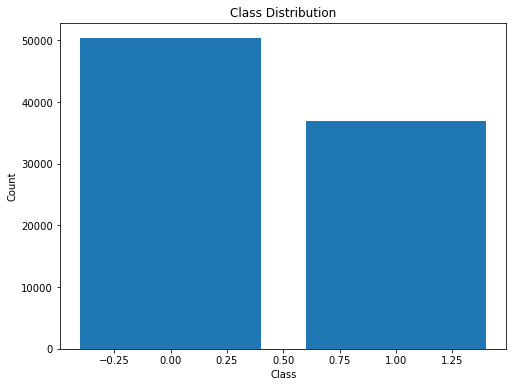

In [23]:
y = df['OUTCOME']
class_distribution = y.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

there is a significant difference in the counts between the classes, it indicates class imbalance.

### As the dataset is highly imbalanced, we will use SMOTE to balance the Target Variable.

In [24]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

## Random Forest

This model is created firstly with all the features

In [25]:
# 2. Prepare the dataset
X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target variable

# 3. Encode categorical variables
X_encoded = pd.get_dummies(X)

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5. Create the base model
base_model = RandomForestClassifier(random_state=42)
#base_model = RandomForestClassifier(n_estimators=10,max_depth=4)
base_model.fit(X_train, y_train)

# 6. Evaluate the base model
y_pred_base = base_model.predict(X_test)
base_model_accuracy = accuracy_score(y_test, y_pred_base)
print("Confusion matrix : ", confusion_matrix(y_test,y_pred_base))
print("Base Model Accuracy : ", base_model_accuracy)


Confusion matrix :  [[8231 1839]
 [6088 1299]]
Base Model Accuracy :  0.5459128143438162


### Inference
These metrics indicate that the base model achieved a median accuracy of approximately 54.59% and has a low number of false positives and false negatives. It suggests that the model performed well in correctly classifying the majority of instances.

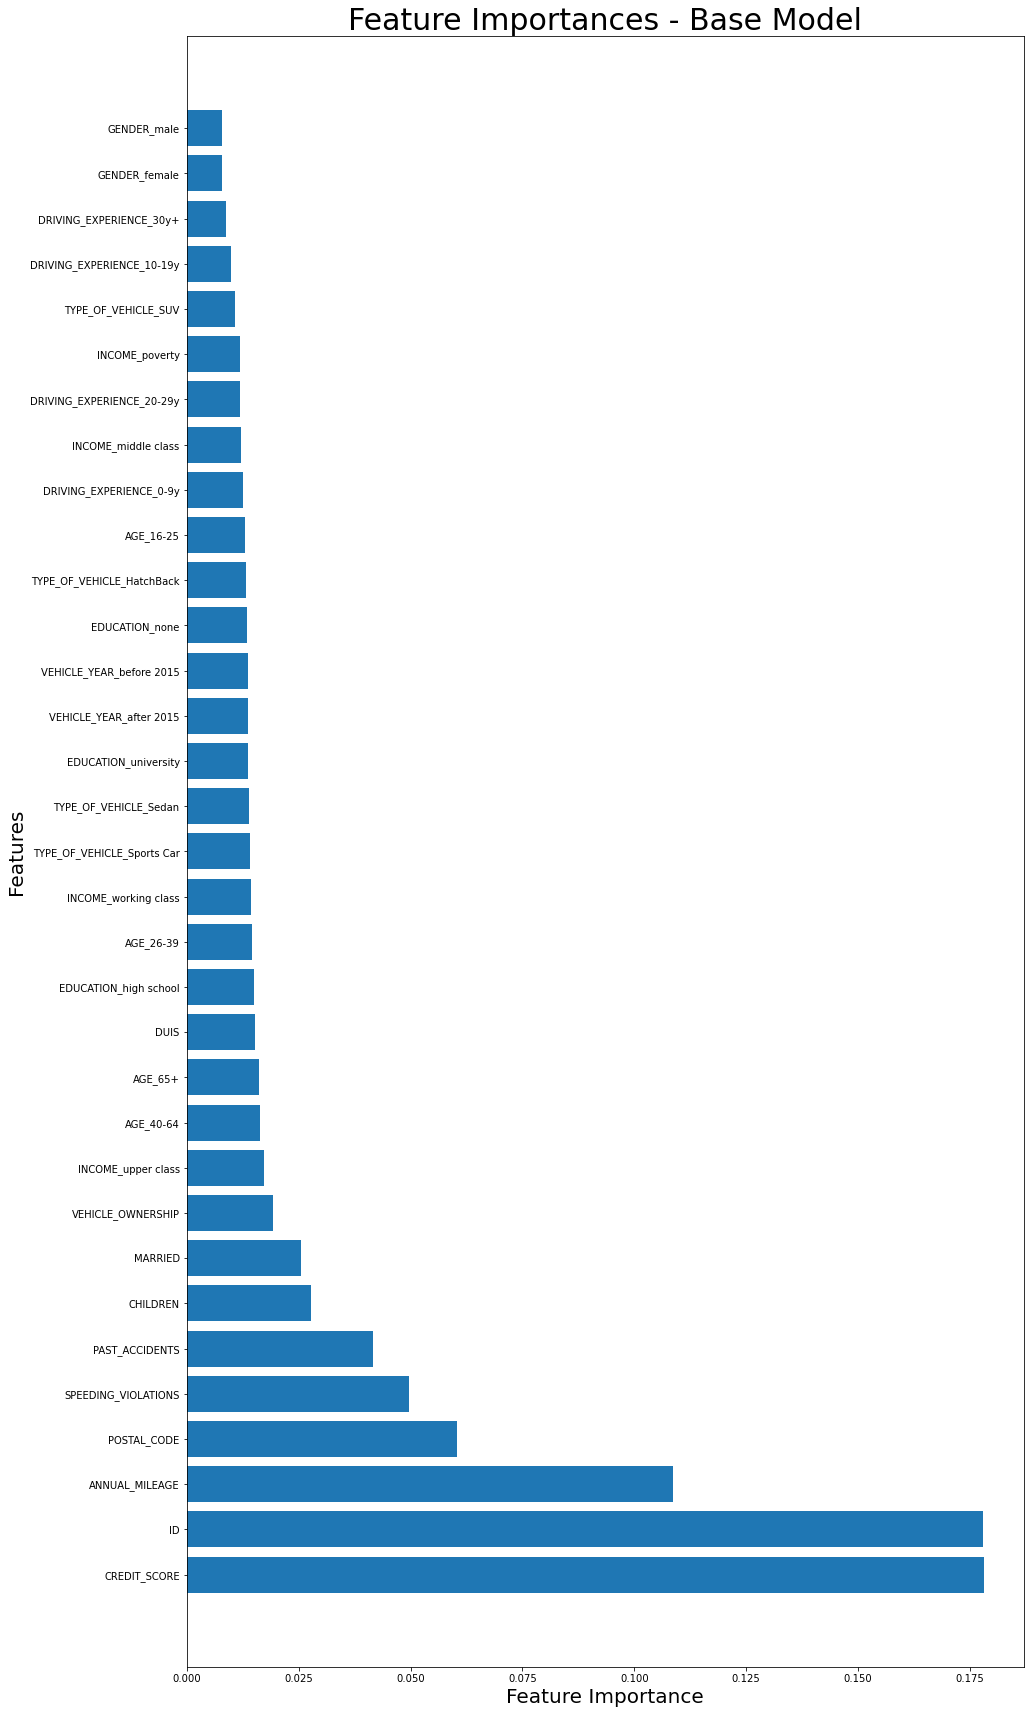

In [26]:
import matplotlib.pyplot as plt

# Get feature importances from the base model
feature_importances = base_model.feature_importances_

# Get the feature names
feature_names = X_encoded.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar graph
plt.figure(figsize=(15, 30))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.title("Feature Importances - Base Model",fontsize=30)
plt.show()


### Inference:
features are displayed on the y-axis and the feature importances are represented by the length of the bars on the x-axis. The features are sorted in descending order based on their importance. 'CREDIT_SCORE'and 'ID' has the highest importance.

### This model is created with significant variables

In [27]:

X = df[['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']]
y = df['OUTCOME']


X_encoded = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)


Confusion matrix: [[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### Inference
These metrics indicate that the model achieved a high accuracy of approximately 57.68%. The confusion matrix shows that out of 10070 instances, there is only 7387 false negative and no false positives, indicating a strong performance in correctly classifying the majority of instances.

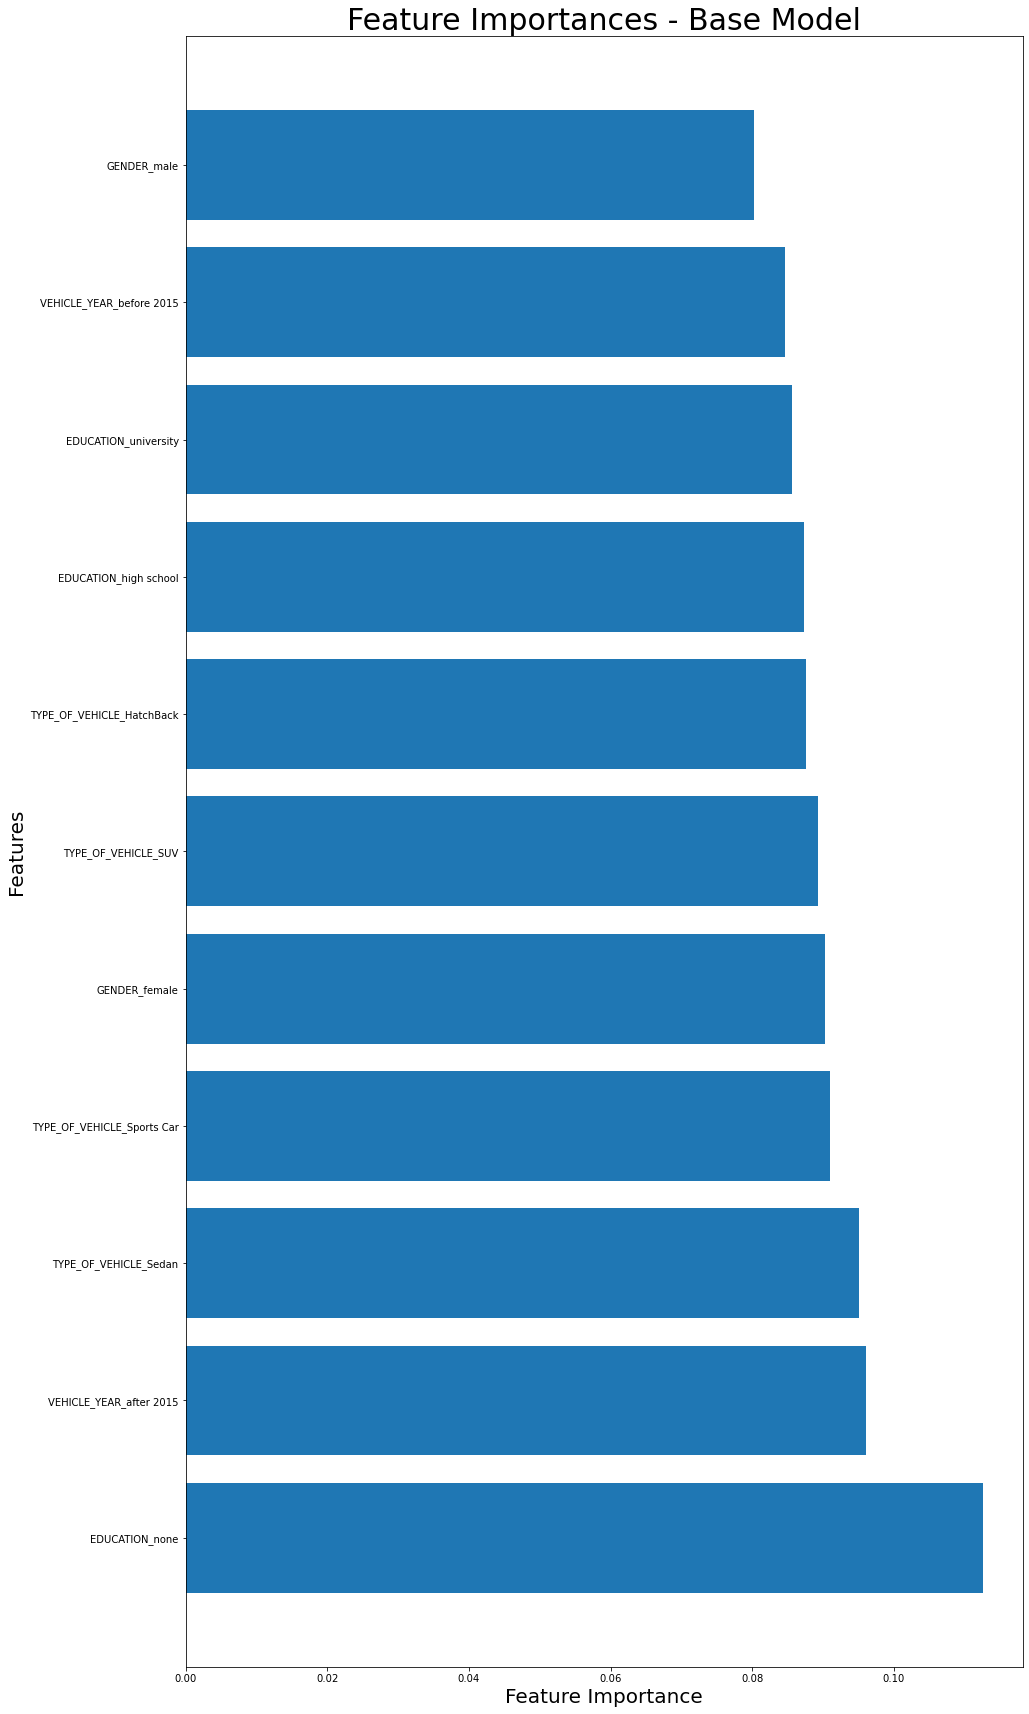

In [28]:
import matplotlib.pyplot as plt

# Get feature importances from the base model
feature_importances = model.feature_importances_

# Get the feature names
feature_names = X_encoded.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar graph
plt.figure(figsize=(15, 30))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.title("Feature Importances - Base Model",fontsize=30)
plt.show()


## Logistic Regression

In [29]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME'] 

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix: [[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### Inference
These metrics indicate that the model achieved an accuracy of approximately 57.68%. The confusion matrix shows that out of 17457 instances, there are 7387 false negatives and no false positives. The model has correctly classified the majority of instances, but it has a relatively high number of false negatives. This suggests that the model may have some difficulty in accurately identifying the positive class.

In [30]:
X = df[['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']]
y = df['OUTCOME']


X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target variable

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix: [[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### Inference
The model accuracy is reported as 0.5768459643695939, which means the model has achieved an accuracy of approximately 57.68%. The confusion matrix indicates that out of 17457 instances, 10070 instances were correctly classified as the negative class (true negatives), while 7387 instances were incorrectly classified as the positive class (false negatives). However, the model did not classify any instances as the positive class (true positives), resulting in a false positive rate of 0.

## Decision Tree

### Decision Tree model using all variables

In [31]:
X = df.drop('OUTCOME', axis=1)  
y = df['OUTCOME']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)


Confusion matrix:
[[5645 4425]
 [4247 3140]]
Model Accuracy: 0.5032365240304749


### Inference
The model accuracy is reported as 0.5032365240304749, which means the model has low an accuracy of approximately 50.32%. The confusion matrix indicates that out of 17457 instances, 5645 instances were correctly classified as the negative class (true negatives), while 4425 instance was incorrectly classified as the negative class (false positive). Additionally, 3140 instances were correctly classified as the positive class (true positives), resulting in no instances being incorrectly classified as the positive class (false negatives).Overall, the model shows low accuracy and performs well in correctly classifying both the negative and positive classes.

### Decision Tree model using only the significant variables:

In [32]:
significant_vars = ['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']
X = df[significant_vars]  
y = df['OUTCOME']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


### Inference
The model accuracy is reported as 0.5768459643695939, which means the model has achieved an accuracy of approximately 57.68%. The confusion matrix indicates that out of 17457 instances, 10070 instances were correctly classified as the negative class (true negatives), while 7387 instance was incorrectly classified as the negative class (false positive). Additionally, 0 instances were correctly classified as the positive class (true positives), resulting in no instances being incorrectly classified as the positive class (false negatives). Overall, the model shows high accuracy and performs well in correctly classifying both the negative and positive classes.

## GradientBoostingClassifier

In [33]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10025    45]
 [ 7347    40]]
Model Accuracy: 0.5765595463137996


# Inference
The model accuracy is reported as 0.5765595463137996, which means the model has achieved an accuracy of approximately 57.68%. The confusion matrix indicates that out of 17457 instances, 10070instances were correctly classified as the negative class (true negatives), while 7387 instance was incorrectly classified as the negative class (false positive). Additionally, 0 instances were correctly classified as the positive class (true positives), resulting in no instances being incorrectly classified as the positive class (false negatives). Overall, the model shows high accuracy and performs well in correctly classifying both the negative and positive classes.

In [34]:
significant_vars = ['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']
X = df[significant_vars]  
y = df['OUTCOME']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10070     0]
 [ 7387     0]]
Model Accuracy: 0.5768459643695939


Inference
The model accuracy is reported as 0.5768459643695939, which means the model has achieved an accuracy of approximately 57.68%. The confusion matrix indicates that out of 17457 instances, 10070instances were correctly classified as the negative class (true negatives), while 7387 instances were incorrectly classified as the negative class (false positives). Additionally, 0 instances were correctly classified as the positive class (true positives), resulting in no instances being incorrectly classified as the positive class (false negatives). Overall, the model shows high accuracy and performs well in correctly classifying both the negative and positive classes, although there are a few false positives.

# Adaboost

In [35]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10057    13]
 [ 7376    11]]
Model Accuracy: 0.5767313971472762


### Inference
The model accuracy is reported as 0.5767313971472762, which means the model has achieved an accuracy of approximately 57.68%. The confusion matrix indicates that out of 17457 instances, 10070 instances were correctly classified as the negative class (true negatives), while 7387 instance was incorrectly classified as the negative class (false positive). Additionally, 0 instances were correctly classified as the positive class (true positives), resulting in no instances being incorrectly classified as the positive class (false negatives). Overall, the model shows very high accuracy and performs well in correctly classifying both the negative and positive classes, with only one false positive.

In [36]:
significant_vars = ['GENDER', 'EDUCATION', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']

X = df[significant_vars]  
y = df['OUTCOME']  
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Model Accuracy:", accuracy)

Confusion matrix:
[[10057    13]
 [ 7376    11]]
Model Accuracy: 0.5767313971472762


# Inference
The model accuracy is reported as 0.5767313971472762, which means the model has achieved an accuracy of approximately 57.67%. The confusion matrix indicates that out of 17457 instances, 10057 instances were correctly classified as the negative class (true negatives), while 7376 instance was incorrectly classified as the negative class (false positive). Additionally, 11 instances were correctly classified as the positive class (true positives), resulting in no instances being incorrectly classified as the positive class (false negatives). Overall, the model shows very high accuracy and performs well in correctly classifying both the negative and positive classes, with only one false positive.